## This notebook compares three sklearn scalers in normalizing features

### 1)min-max scaler ignores outliers. all data will be on the interval [0,1]
### 2)standars scaler works better if the underlying distribution is close to normal
### 3)normalizer operates row-wise and scales the row to norm 1

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# generate random samples
X,y = make_classification(n_samples = 1000,n_features =5,n_informative=5,n_redundant=0,random_state=1)
print('X before standardlization')
print(X[:3,:])
# X-min(X)/(max(X)-min(X))
# MinMaxScaler re-scale the variables by column
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
print('X after standardlization')
print(scaled_X[:3,:])
# fit again
print('fitting data using fit and transform separately')
scaler.fit(X)
scaled_X2 = scaler.transform(X)
print(scaled_X2[:3,:])

X before standardlization
[[ 2.39324489 -5.77732048 -0.59062319 -2.08095322  1.04707034]
 [-0.45820294  1.94683482 -2.46471441  2.36590955 -0.73666725]
 [ 2.35162422 -1.00061698 -0.5946091   1.12531096 -0.65267587]]
X after standardlization
[[0.77608466 0.0239289  0.48251588 0.18352101 0.59830036]
 [0.40400165 0.79590304 0.27369632 0.6331332  0.42104156]
 [0.77065362 0.50132629 0.48207176 0.5076991  0.4293882 ]]
fitting data using fit and transform separately
[[0.77608466 0.0239289  0.48251588 0.18352101 0.59830036]
 [0.40400165 0.79590304 0.27369632 0.6331332  0.42104156]
 [0.77065362 0.50132629 0.48207176 0.5076991  0.4293882 ]]


In [13]:
# StandardScaler
standard_scaler  = StandardScaler()
print('X before standardlization')
print(X[:3,:])
# X-avg(X)/std(X)
# StandardScaler re-scale the variables by column
scaled_X = standard_scaler.fit_transform(X)
print('X after standardlization')
print(scaled_X[:3,:])

X before standardlization
[[ 2.39324489 -5.77732048 -0.59062319 -2.08095322  1.04707034]
 [-0.45820294  1.94683482 -2.46471441  2.36590955 -0.73666725]
 [ 2.35162422 -1.00061698 -0.5946091   1.12531096 -0.65267587]]
X after standardlization
[[ 1.67152475 -4.00938431 -0.02146232 -2.01058854  0.97742549]
 [-0.33677098  0.94960782 -1.17380472  0.88773515 -0.13654955]
 [ 1.64221101 -0.94268846 -0.02391318  0.07915245 -0.08409548]]


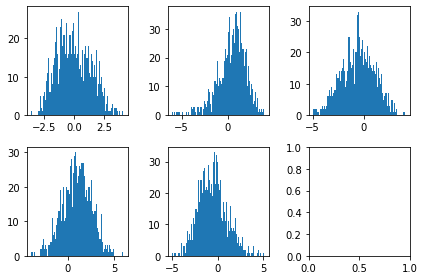

In [31]:
fig,ax = plt.subplots(2,3,tight_layout=True)
for i in range(5):
    r = i//3
    c = i%3
    ax[r,c].hist(X[:,i], density=False, bins=100)

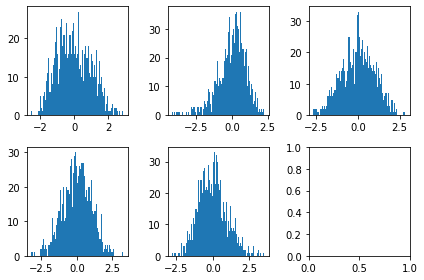

In [32]:
fig,ax = plt.subplots(2,3,tight_layout=True)
for i in range(5):
    r = i//3
    c = i%3
    ax[r,c].hist(scaled_X[:,i], density=False, bins=100)

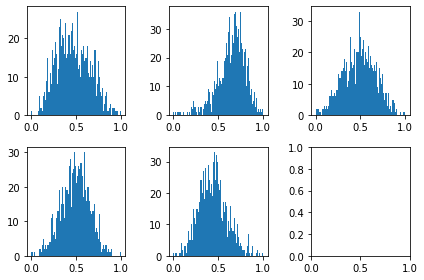

In [33]:
fig,ax = plt.subplots(2,3,tight_layout=True)
for i in range(5):
    r = i//3
    c = i%3
    ax[r,c].hist(scaled_X2[:,i], density=False, bins=100)

In [40]:
print(pd.DataFrame(X).describe()) # original
print(pd.DataFrame(scaled_X).describe()) # standard
print(pd.DataFrame(scaled_X2).describe()) # min/max

                 0            1            2            3            4
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.019956     0.467720    -0.555718     1.003868    -0.518019
std       1.420545     1.558385     1.627146     1.535056     1.602038
min      -3.554258    -6.016746    -4.921054    -3.896057    -4.973566
25%      -1.068737    -0.329898    -1.685522    -0.000439    -1.657853
50%      -0.093996     0.681331    -0.515373     1.037245    -0.578766
75%       1.106043     1.505853     0.591245     2.041581     0.425395
max       4.109214     3.988971     4.053637     5.994384     5.089334
                  0             1             2             3             4
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03
mean  -5.684342e-17  7.105427e-18 -5.755396e-16  3.694822e-16 -3.570477e-16
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00
min   -2.517346e+00 -4.163098e+00 -2.684161e+00 -3.193615